# DACS Elevator Radio Producer

In [3]:
# Create a new conda virtual environment
#!conda create -n nlp_project7 python=3.9
#!conda activate nlp_project7

# Install all relied libraries
#!pip install -r requirements.txt

## Get data from billboard top 100 不要重新运行
If this year's data is stored then it won't grab again. You can directly use them.

In [ ]:
# Change this to start our journey:
address = '2019'

In [3]:
from data.base import store_lyrics

store_lyrics(year = address)

Illegal input year. Setting year to be the current.
Searching for "Heat Waves" by Glass Animals...
Done.
Searching for "As It Was" by Harry Styles...
Done.
Searching for "Stay" by The Kid LAROI & Justin Bieber...
Done.
Searching for "Easy On Me" by Adele...
Done.
Searching for "Shivers" by Ed Sheeran...
Done.
Searching for "First Class" by Jack Harlow...
Done.
Searching for "Big Energy" by Latto...
Done.
Searching for "Ghost" by Justin Bieber...
Done.
Searching for "Super Gremlin" by Kodak Black...
Done.
Searching for "Cold Heart (PNAU Remix)" by Elton John & Dua Lipa...
Done.
Searching for "Wait For U" by Future Featuring Drake & Tems...
Done.
Searching for "About Damn Time" by Lizzo...
Done.
Searching for "Bad Habits" by Ed Sheeran...
Done.
Searching for "Thats What I Want" by Lil Nas X...
Done.
Searching for "Enemy" by Imagine Dragons X JID...
Done.
Searching for "Industry Baby" by Lil Nas X & Jack Harlow...
Done.
Searching for "abcdefu" by GAYLE...
Done.
Searching for "Need To Know

## Get data from a playlist from spotify 不要重新运行
### How to find playlist ID:
![playlist id](imgs/playlist_id.png)

Or if you share the playlist with link, find the string before `?si=`:  
https://open.spotify.com/playlist/**37i9dQZF1DX5Ejj0EkURtP**?si=a1e0243dd67c4cc3


In [1]:
# Change this to start our journey:
address = '37i9dQZF1DX5Ejj0EkURtP'

In [3]:
from data.base import store_lyrics

store_lyrics(playlist_id=address)

Searching for "See You Again (feat. Kali Uchis)" by Tyler, The Creator...
Done.
Searching for "Starboy" by The Weeknd...
Done.
Searching for "Another Love" by Tom Odell...
Done.
Searching for "Sweater Weather" by The Neighbourhood...
Done.
Searching for "Sure Thing" by Miguel...
Done.
Searching for "No Role Modelz" by J. Cole...
Done.
Searching for "Perfect" by Ed Sheeran...
Done.
Searching for "lovely (with Khalid)" by Billie Eilish...
Done.
Searching for "Watermelon Sugar" by Harry Styles...
Done.
Searching for "Believer" by Imagine Dragons...
Done.
Searching for "Night Changes" by One Direction...
Done.
Searching for "Someone You Loved" by Lewis Capaldi...
Done.
Searching for "When I Was Your Man" by Bruno Mars...
Done.
Searching for "Do I Wanna Know?" by Arctic Monkeys...
Done.
Searching for "Call Out My Name" by The Weeknd...
Done.
Searching for "Shape of You" by Ed Sheeran...
Done.
Searching for "Pink + White" by Frank Ocean...
Done.
Searching for "One Dance" by Drake...
Done.
Se

## Pre-process:

In [2]:
from data.base import read_cleaned_data

address = "02qb8e6szfLh70GeVovct1" # TODO: Change here to have another try!
lyrics_tokens = read_cleaned_data(address,remove_stopwords = False, stem_words = True)

In [3]:
name = list(lyrics_tokens.keys())[2]
print(name)
print(lyrics_tokens[name])

11_The Look
[['you', 'be', 'up', 'but', 'you', 'will', 'get', 'down'], ['you', 'be', 'never', 'run', 'from', 'this', 'town'], ['and', 'i', 'think', 'you', 'say'], ['``', 'you', 'will', 'never', 'get', 'anything', 'good', 'than', 'this'], ['cause', 'you', 'be', 'go', 'round', 'in', 'circle'], ['and', 'everyone', 'know', 'you', 'be', 'trouble', "''"], ['cause', 'you', 'read', 'it', 'in', 'big', 'book'], ['and', 'now', 'you', 'be', 'give', 'me', 'look', 'look'], ['but', 'just', 'remember', 'how', 'we', 'shake', 'shake'], ['and', 'all', 'thing', 'we', 'take', 'take'], ['this', 'town', 'old', 'friend', 'of', 'mine'], ['we', 'get', 'up', 'and', 'we', 'get', 'down'], ['we', 'be', 'always', 'run', 'round', 'this', 'town'], ['and', 'to', 'think', 'they', 'say'], ['we', 'd', 'never', 'make', 'anything', 'good', 'than', 'this'], ['cause', 'we', 'be', 'always', 'in', 'small', 'circle'], ['and', 'everyone', 'think', 'we', 'be', 'trouble'], ['we', 'do', 'not', 'read', 'it', 'in', 'big', 'book'], ['w

## Get topics:

In [4]:
from model.base import get_keywords

result = get_keywords(lyrics_tokens)
#result = get_keywords(lyrics_tokens, model = 'bert', n_gram=(1,1), word_no=5)

c:\Users\P70086556\Anaconda3\envs\nlp_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Song: 100_Leathers. Topic: [('revolt', 0.4998), ('resist', 0.4482), ('confess', 0.3816), ('forth', 0.3588), ('tongue', 0.347)].
Song: 10_only shallow. Topic: [('pillow', 0.5193), ('comfort', 0.4129), ('sleep', 0.3627), ('soft', 0.3456), ('feel', 0.3074)].
Song: 11_The Look. Topic: [('town', 0.3671), ('trouble', 0.3669), ('shake', 0.2835), ('round', 0.2507), ('shook', 0.2458)].
Song: 13_Kids. Topic: [('haunt', 0.4405), ('tree', 0.3888), ('plant', 0.3315), ('child', 0.2869), ('control', 0.2757)].
Song: 14_Weird Fishes Arpeggi. Topic: [('ocean', 0.4252), ('sea', 0.4118), ('worm', 0.3984), ('escape', 0.3917), ('deep', 0.3469)].
Song: 15_Jigsaw Falling Into Place. Topic: [('song', 0.4422), ('come', 0.2656), ('beat', 0.2645), ('nightmare', 0.2618), ('hand', 0.2569)].
Song: 16_Bangers  Mash. Topic: [('bite', 0.428), ('poison', 0.421), ('puke', 0.3054), ('bit', 0.2909), ('pyramid', 0.2755)].
Song: 17_15 Step. Topic: [('string', 0.2795), ('reel', 0.266), ('undone', 0.239), ('end', 0.2316), ('dr

### Store the extraction result

In [7]:
from data.base import store_extraction_result

df = store_extraction_result(result, f"{address}.csv")
df

,name,topic1,topic2,topic3,topic4,topic5
0,100_Leathers,revolt,resist,confess,forth,tongue
1,10_only shallow,pillow,comfort,sleep,soft,feel
2,11_The Look,town,trouble,shake,round,shook
3,13_Kids,haunt,tree,plant,child,control
4,14_Weird Fishes Arpeggi,ocean,sea,worm,escape,deep
...,...,...,...,...,...,...
85,96_Dont Look Back In Anger,rock,revolution,band,slip,walk
86,97_Heartbreaker,heartbreaker,break,breaker,hear,babe
87,98_Body Vehicle,cherish,feel,escape,miss,bitter
88,99_Waiting for the End,beginnin,end,rhythm,listen,know


## Cluster and visualizaton
### First: We choose the first keyword for every song and visualize them. So we have 100 keywords for 100 songs.    
The size of circle is the frequency of the word appear in 100 keywords.  

### Use lyrics as training data to train the word2vec model

In [11]:
# Train our own word2vec
train_data = []
for a in range(2018,2023):
    l = read_cleaned_data(a,stem_words = False)
    train_data.extend(sum(list(l.values()), []))

print(train_data[0])

['and', 'they', 'wishing', 'and', 'wishin']


In [15]:
from model import w2v

model = w2v.train_wvmodel(train_data)
w2v.save_wvmodel(model)

In [55]:
from gensim.models import Word2Vec
model = Word2Vec.load("result/our_model.model").wv

### Use pre-trained word2vec model

word brockhampton dose not have vector
word boondock dose not have vector
word molière dose not have vector
word rhayader dose not have vector
word heckyll dose not have vector
word albumsminutemen dose not have vector
word napoleonic dose not have vector
word brahmanhood dose not have vector
word vampyrism dose not have vector


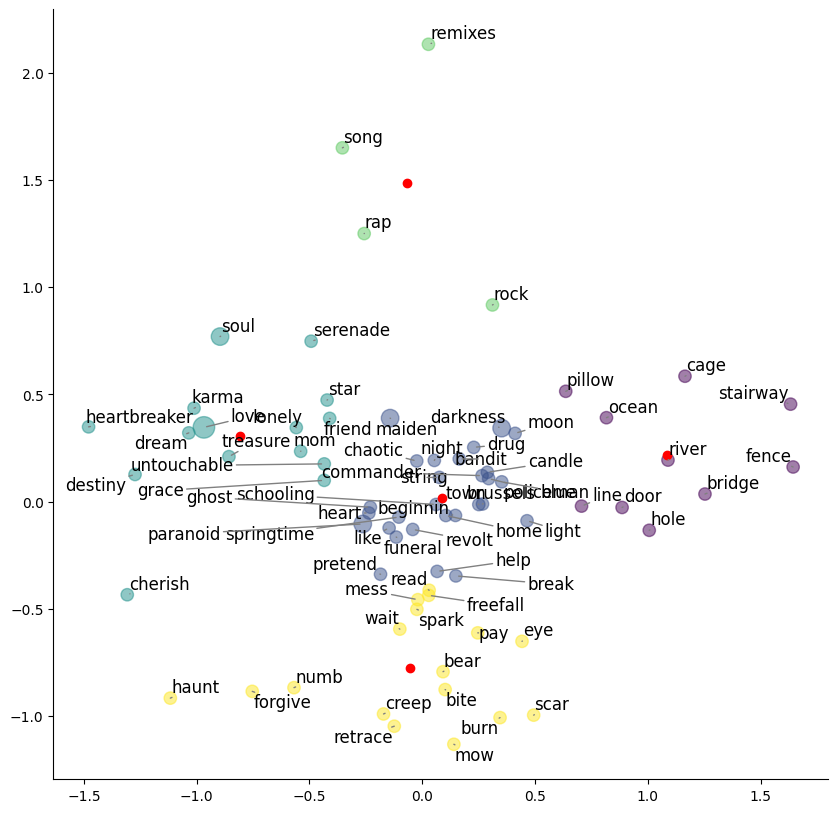

In [12]:
from model import cluster
import pandas as pd

df = pd.read_csv(f"./result/{address}.csv")
cluster.plot_one_per_song(df)
#cluster.plot_one_per_song(df,cluster_no=8, wv_model = model)

Another way:  
We choose the first 5 keywords for every song and sort them by frequency. So we have 500 keywords for 100 songs and we visualize the first 100 in the plot.    
The size of circle is the frequency of the word appear in 100 keywords.

word albumsminutemen dose not have vector
word albumsnew dose not have vector
word albumscurrent dose not have vector
word albumsecco dose not have vector
word brockhampton dose not have vector
word boondock dose not have vector
word molière dose not have vector
word rhayader dose not have vector
word heckyll dose not have vector


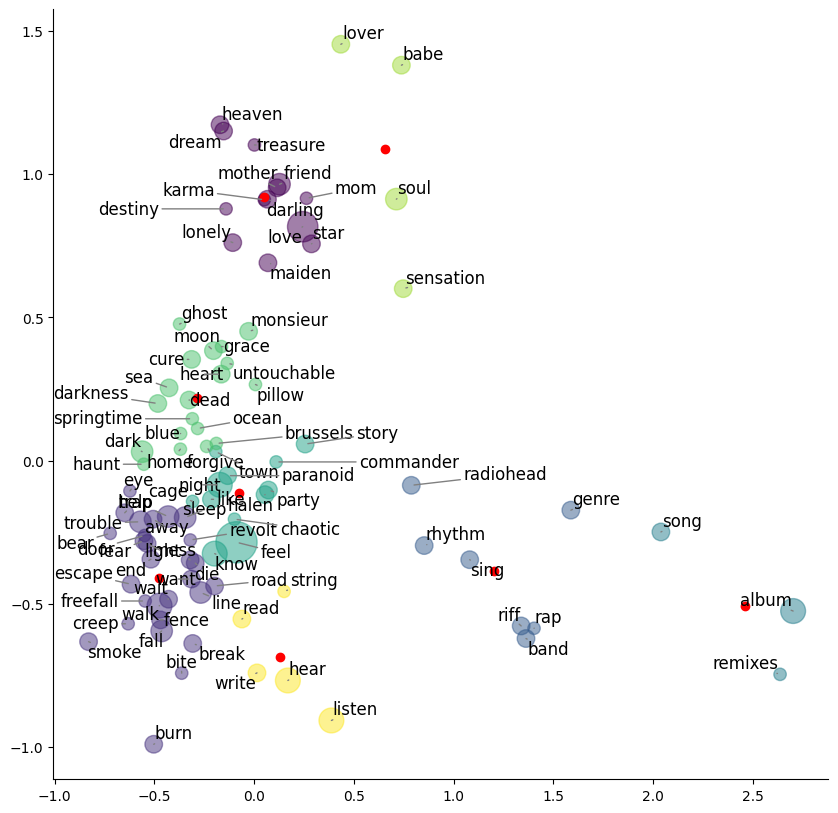

In [10]:
cluster.plot_five_per_song(df, cluster_no=8)
#cluster.plot_five_per_song(df,cluster_no=8, wv_model = model)

### Other visualization

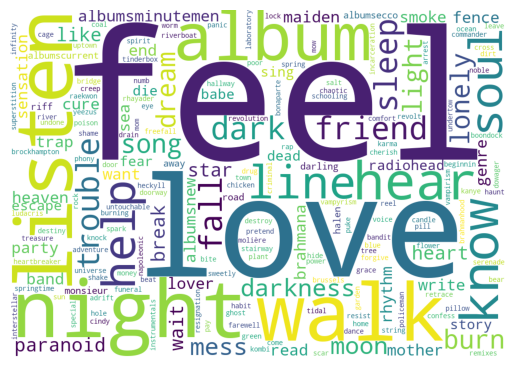

In [9]:
import pandas as pd
from data import analysis
from model import cluster

words = cluster.generate_word_list(pd.read_csv(f"./result/{address}.csv"), 5)
analysis.plot_word_cloud(words)

## Evaluation
get_keywords有一个参数是用来调节使用的模型的 默认是bert 也可以改到tfidf  
但不管哪个模型返回的数据类型都是一模一样的 其它所有的方法都是通用的  
包括导出数据、之后的分析等等

In [11]:
from model.base import get_keywords

result = get_keywords(lyrics_tokens,model = 'tfidf')

Song: 100_Leathers. Topic: [('your', 14.556090791758852), ('you', 12.980874791444654), ('show', 12.396908869280152), ('inside', 12.01500960059106), ('look', 10.90701232632585)].
Song: 10_only shallow. Topic: [('where', 3.5018749494155994), ('wo', 3.5018749494155994), ('like', 3.4657359027997265), ('there', 3.4657359027997265), ('pillow', 3.295836866004329)].
Song: 11_The Look. Topic: [('take', 15.848011750932667), ('this', 12.8707837791528), ('town', 12.792471128380448), ('look', 11.8860088131995), ('you', 11.471059342580158)].
Song: 13_Kids. Topic: [('be', 14.07264312986198), ('you', 13.780392653449049), ('it', 13.397743454849977), ('to', 13.397743454849977), ('of', 12.323560327577193)].
Song: 14_Weird Fishes Arpeggi. Topic: [('i', 10.745302216251911), ('and', 9.91946213850651), ('way', 9.303584474467002), ('out', 9.303584474467002), ('bottom', 8.523740461192126)].
Song: 15_Jigsaw Falling Into Place. Topic: [('you', 16.80639368871428), ('just', 14.075779845216088), ('a', 13.1275352042